In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits
import dask.array as da

from cycspec_simulator import (
    Time,
    BasebandData,
    PolynomialPredictor,
    cycfold_cpu,
    guppi_raw,
)
from cycspec_simulator.scattering import ScintillationPattern

%matplotlib notebook

In [2]:
data = guppi_raw.read('B1937+21-overlap-shorter.raw', use_dask=False)

In [3]:
data.A.shape

(2, 262144)

In [4]:
hdr = list(guppi_raw.read_headers('B1937+21-overlap-shorter.raw'))[0]
4*hdr['BLOCSIZE']/8 - 3*hdr['OVERLAP']

262144.0

In [5]:
predictor = PolynomialPredictor.from_file("polyco-B1937+21-60000.dat")

In [7]:
%time pspec = cycfold_cpu(data, 1024, 1024, predictor)

CPU times: user 10.5 s, sys: 156 ms, total: 10.6 s
Wall time: 10.6 s


<IPython.core.display.Javascript object>


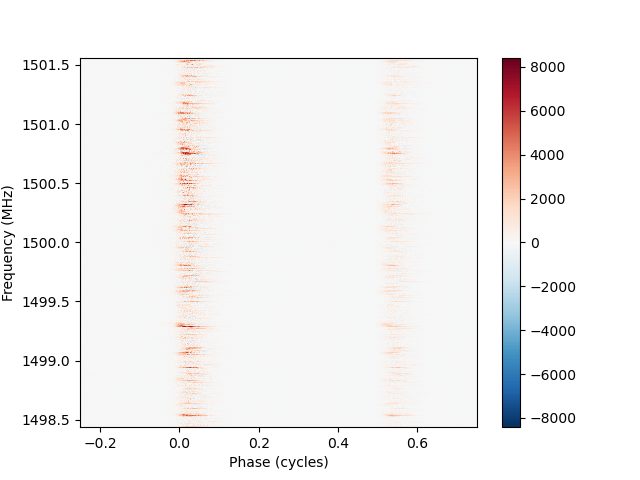

In [8]:
pc = pspec.plot(shift=0.25, cmap='RdBu_r', sym_lim=True)
plt.colorbar(pc)
plt.show()

In [9]:
np.savez('B1937+21-pspec-shorter.npz',
         I=pspec.I, Q=pspec.Q, U=pspec.U, V=pspec.V,
         freq=pspec.freq, phase=pspec.phase)